In [4]:
import sklearn
import pandas as pd
import numpy as np
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC


stop_words = set(stopwords.words('english'))

In [5]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

In [6]:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [7]:
def preprocess_tweet_text(tweet):
    tweet.lower()
   
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
   
    tweet = re.sub(r'\@\w+|\#','', tweet)
   
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
   
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    
    return " ".join(lemma_words)


In [8]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [9]:
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

In [10]:
train_dataset = load_dataset("Desktop/content/Tweets.csv", ['tweet_id','airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text','tweet_coord','tweet_created','tweet_location','user_timezone'])

train_dataset = remove_unwanted_cols(train_dataset,['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'])

In [11]:
print(train_dataset[0:5])

  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


In [12]:
train_dataset.text = train_dataset['text'].apply(preprocess_tweet_text)
print(train_dataset.text)

0                                                what said
1                        plu youv ad commerci experi tacki
2           i didnt today must mean i need take anoth trip
3        realli aggress blast obnoxi entertain guest fa...
4                                     realli big bad thing
                               ...                        
14635                      thank got differ flight chicago
14636    leav 20 minut late flight no warn commun 15 mi...
14637             pleas bring american airlin blackberry10
14638    money chang flight dont answer phone ani sugge...
14639    8 ppl need 2 know mani seat next flight plz pu...
Name: text, Length: 14640, dtype: object


In [13]:
tf_vector = get_feature_vector(np.array(train_dataset.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(train_dataset.iloc[:, 1]).ravel())
y = np.array(train_dataset.iloc[:, 0]).ravel()

In [11]:
#print(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [15]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nb))

0.6775956284153005


In [25]:
#print(y_predict_nb)
from sklearn.metrics import confusion_matrix
print("confusion matrix: ")
print(confusion_matrix(y_predict_nb, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_nb))

confusion matrix: 
[[1816  529  369]
 [  18   89   12]
 [   1   15   79]]
              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      1835
     neutral       0.75      0.14      0.24       633
    positive       0.83      0.17      0.28       460

    accuracy                           0.68      2928
   macro avg       0.75      0.43      0.44      2928
weighted avg       0.71      0.68      0.60      2928



In [19]:
#print(y_test)

In [30]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_predict_svc=SVCmodel.predict(X_test)
print(accuracy_score(y_test,y_predict_svc))

0.7827868852459017


In [17]:
#print(y_test)

In [31]:
from sklearn.metrics import confusion_matrix
print("confusion matrix: ")
print(confusion_matrix(y_predict_svc, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_svc))


confusion matrix: 
[[1682  252  117]
 [ 128  336   69]
 [  25   45  274]]
              precision    recall  f1-score   support

    negative       0.82      0.92      0.87      1835
     neutral       0.63      0.53      0.58       633
    positive       0.80      0.60      0.68       460

    accuracy                           0.78      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.78      0.77      2928



In [14]:
import tweepy
from tweepy import *
import csv

In [15]:
consumer_key = "gNBPAEMYVmzcgrDQ5g0xjaKUS"
consumer_secret = "okOoTN1uCmFC0JNzFkcbGMFWc2fEHiDRzn5miFL5maf3mCN7Lb"
access_key= "1401205899461496833-jZivcYrQVZNUCNuXglUZTdNLJvffvD"
access_secret = "YD4Swn75wiPes8PQ3zpluiY4hOJ3csu4xmhRKJ8hytJS6"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [17]:
csvFile = open('test_dataset5', 'a')
csvWriter = csv.writer(csvFile)

In [ ]:
search_words = input("Please enter keyword or hashtag to search: ")      # enter your words
new_search = search_words + " -filter:retweets"
 
for tweet in tweepy.Cursor(api.search,q=new_search,count=50,
                           lang="en",
                           since_id=0).items():
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])

Please enter keyword or hashtag to search: "#china"


In [14]:
test_dataset = load_dataset("test_dataset5", ['tweet.created_at', 'tweet.text','tweet.user.screen_name','tweet.user.location'])
n_dataset = remove_unwanted_cols(test_dataset, ['tweet.created_at','tweet.user.screen_name','tweet.user.location'])

In [15]:
print(test_dataset[0:5])

                                          tweet.text
0  b'Staff writer @RukiaZhao tackled the tumultuo...
1  b'#June28\n\n5. #Pakistan\xe2\x80\x99s exports...
2  b"J&amp;K a separate country, Leh is China's t...
3  b'Enjoy one of the world\xe2\x80\x99s greatest...
4  b'The State of #Texas will be next #Bitcoin mi...


In [16]:
test_dataset.text = test_dataset['tweet.text'].apply(preprocess_tweet_text)

<ipython-input-16-2c3a8e569a74>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_dataset.text = test_dataset['tweet.text'].apply(preprocess_tweet_text)


In [17]:
test_feature = tf_vector.transform(np.array(test_dataset.iloc[:, 0]).ravel())

In [18]:
result= SVCmodel.predict(test_feature)

In [19]:
print(result)

['negative' 'negative' 'neutral' ... 'negative' 'negative' 'negative']


In [20]:
res=[]
pos=0
neg=0
neut=0
irr=0
for i in result:
    if i=='positive':
        pos+=1
        res.append(1)
    elif(i=='neutral'):
        neut+=1
        res.append(0)
    elif(i=='negative'):
        neg+=1
        res.append(-1)
print("positive no. of counts:",pos)
print("Neutral no. of counts:",neut)
print("Negative no. of counts:",neg) 

positive no. of counts: 152
Neutral no. of counts: 2183
Negative no. of counts: 6509


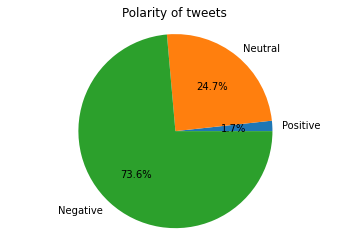

In [21]:
import matplotlib.pyplot as plt
Polarity=[pos,neut,neg]
my_labels = 'Positive','Neutral','Negative'
plt.pie(Polarity,labels=my_labels,autopct='%1.1f%%')
plt.title('Polarity of tweets')
plt.axis('equal')
plt.show()

In [ ]:
#Connect to Twitter API i.e., Authentication to twitter API
import tweepy
from tweepy import *
import csv
consumer_key = "gNBPAEMYVmzcgrDQ5g0xjaKUS"
consumer_secret = "okOoTN1uCmFC0JNzFkcbGMFWc2fEHiDRzn5miFL5maf3mCN7Lb"
access_key= "1401205899461496833-jZivcYrQVZNUCNuXglUZTdNLJvffvD"
access_secret = "YD4Swn75wiPes8PQ3zpluiY4hOJ3csu4xmhRKJ8hytJS6"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#search for keyword a fetch matched data to a csv folder.
csvFile = open('test_dataset', 'a')
csvWriter = csv.writer(csvFile)
search_words = input("Please enter keyword or hashtag to search: ")      # enter your words
new_search = search_words + " -filter:retweets"
 
for tweet in tweepy.Cursor(api.search,q=new_search,count=50,
                           lang="en",
                           since_id=0).items():
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])


#load the downloaded csv file and remove unwanted columns.
test_dataset = load_dataset("test_dataset", ['tweet.created_at', 'tweet.text','tweet.user.screen_name','tweet.user.location'])
n_dataset = remove_unwanted_cols(test_dataset, ['tweet.created_at','tweet.user.screen_name','tweet.user.location'])

#apply preprocessing and remove unwanted data.Convert to vectorizer form.
test_dataset.text = test_dataset['tweet.text'].apply(preprocess_tweet_text)
test_feature = tf_vector.transform(np.array(test_dataset.iloc[:, 0]).ravel())

#Predict plority using SVM Machine Learning Algorithm and plot the results.
result= SVCmodel.predict(test_feature)
import matplotlib.pyplot as plt
Polarity=[pos,neut,neg]
my_labels = 'Positive','Neutral','Negative'
plt.pie(Polarity,labels=my_labels,autopct='%1.1f%%')
plt.title('Polarity of tweets')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_pp=clf.fit(X_train, y_train)
y_predict_sv = clf_pp.predict(X_test)
print(accuracy_score(y_test, y_predict_sv))

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_predict_bb=BNBmodel.predict(X_test)
print(accuracy_score(y_test, y_predict_bb))

In [ ]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

In [ ]:

dataset = load_dataset("Desktop/content/training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])

n_dataset = remove_unwanted_cols(dataset, ['t_id', 'created_at', 'query', 'user'])

dataset.text = dataset['text'].apply(preprocess_tweet_text)
# Split dataset into Train, Test

# Same tf vector will be used for Testing sentiments on unseen trending data
tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nb))



In [7]:
train_dataset = load_dataset("Desktop/content/training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Remove unwanted columns from dataset
n_dataset = remove_unwanted_cols(train_dataset, ['t_id', 'created_at', 'query', 'user'])

In [ ]:
train_dataset = load_dataset("Desktop/content/full-corpus.csv", ["Topic","Sentiment","TweetId","TweetDate","TweetText"])

n_dataset = remove_unwanted_cols(train_dataset, ["Topic","TweetId","TweetDate"])

In [ ]:

print(dataset['text'])

In [ ]:
!pip install -q kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files("jemishdonda/headbrain")

In [ ]:
!kaggle competitions download -c twitter-sentiment-analysis2

In [69]:
train_dataset = load_dataset("Desktop/content/Tweets.csv", ['tweet_id','airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text','tweet_coord','tweet_created','tweet_location','user_timezone'])
train_dataset = remove_unwanted_cols(train_dataset,['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'])

In [29]:
test_dataset = load_dataset("Desktop/content/stock_data.csv", ['Text','Sentiment'])
#test_dataset = remove_unwanted_cols(test_dataset,["Sentiment"])

In [54]:
arr = np.array(test_dataset.iloc[:, 1]).ravel()

In [73]:
print(arr)

["b'positive'" "b'positive'" "b'positive'" ... "b'irrelevant'"
 "b'irrelevant'" "b'irrelevant'"]


In [83]:
ts_res=[]
ne=0
po=0
ng=0
ir=0
for i in arr:
    if i=="b'neutral'":
        ne+=1
        ts_res.append(0)
    elif i=="b'positive'":
        po+=1
        ts_res.append(1)
    elif i=="b'negative'":
        ng+=1
        ts_res.append(-1)
    else:
        ir+=1
        ts_res.append(2)
print("positive count:",po)
print("Neutral count:",ne)
print("Negative count:",ng)
print("irrelevant count:",ir)

positive count: 390
Neutral count: 1818
Negative count: 431
irrelevant count: 1342


In [84]:
print(res)

[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1

In [85]:
print(accuracy_score(res, ts_res))

0.12861090178347148
